This dataset contains medical insurance cost information for 1338 individuals. It includes demographic and health-related variables such as age, sex, BMI, number of children, smoking status, and residential region in the US. The target variable is charges, which represents the medical insurance cost billed to the individual.
Linear and Polynomial Regression have been used as the predictive models 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('insurance.csv')
df.head(31)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#handle missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#handle and drop duplicate entries
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [6]:
#handle outliers for numerical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_features
for feature in numerical_features:
    Q1=np.percentile(df[feature],25)
    Q3=np.percentile(df[feature],75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df[feature]=np.where(df[feature]<lower_limit,lower_limit,df[feature])
    df[feature]=np.where(df[feature]>upper_limit,upper_limit,df[feature])
    

In [8]:
#general information about dataset
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.6+ KB


,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.650247,1.095737,NaN,NaN,12491.159952
std,14.044333,NaN,6.059655,1.205571,NaN,NaN,10165.511950
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


C:\Users\HomePC\AppData\Local\Temp\ipykernel_14660\1993097917.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


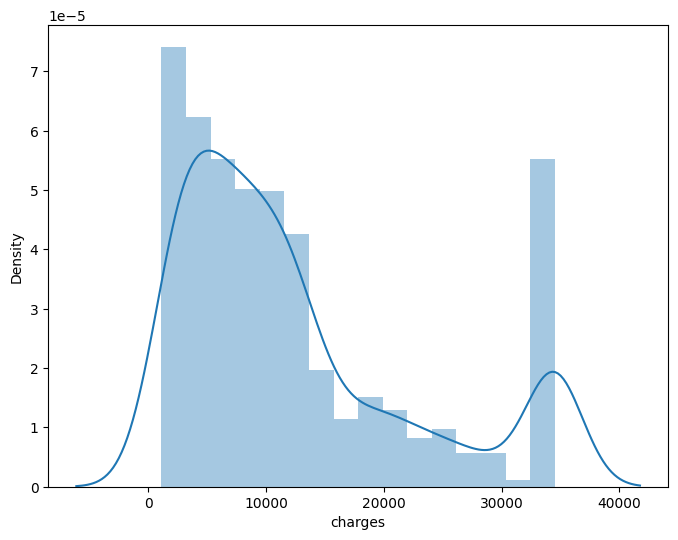

In [9]:
#distribution of target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.distplot(df['charges'])
plt.show()


In [10]:
#remove missing values
df.dropna(inplace=True)


In [11]:
#label encoding for categorical columns
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feature in categorical_features:
    df[feature]=le.fit_transform(df[feature])   
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520


In [12]:
#split the dataset into independent and dependent features(x and y)
X=df.drop('charges',axis=1)
y=df['charges']


In [13]:
#split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#train the linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [15]:
#evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2)


Mean Absolute Error: 3149.8983211663335
Mean Squared Error: 20952099.05161497
Root Mean Squared Error: 4577.346289239538
R2 Score: 0.8206978963475258


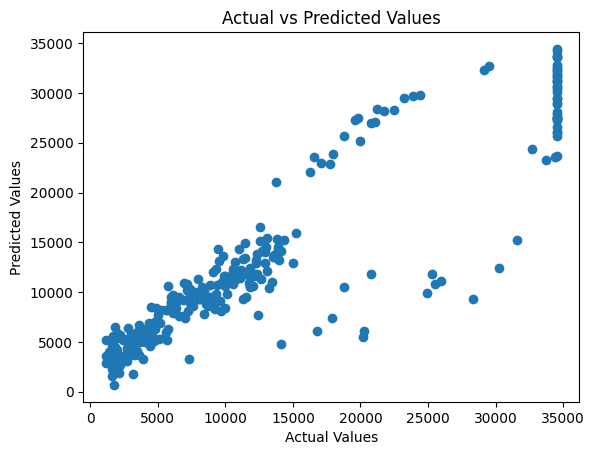

In [20]:
#plotting actual vs predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


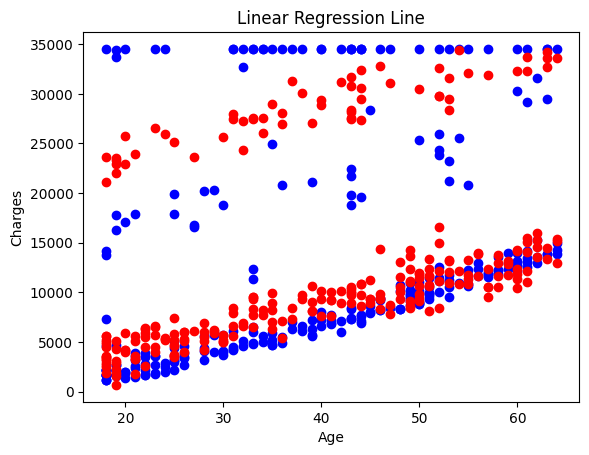

In [21]:
#plot the linear regression line
plt.scatter(X_test['age'],y_test,color='blue')
plt.scatter(X_test['age'],y_pred,color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Line')
plt.show()


In [25]:
#carry out predictions on new data
new_data = pd.DataFrame({
	'age': [20],
	'sex': [1],         # example: 1 for male, 0 for female
	'bmi': [27.5],      # example BMI value
	'children': [0],    # example: 0 children
	'smoker': [0],      # example: 0 for non-smoker, 1 for smoker
	'region': [2]       # example: region code (0-3)
})
predicted_charge = lr.predict(new_data)
print(f'Predicted Insurance Charge: {predicted_charge[0]:.2f}')


Predicted Insurance Charge: 2772.49


In [26]:
#train a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
poly_lr=LinearRegression()
poly_lr.fit(X_train_poly,y_train)
y_poly_pred=poly_lr.predict(X_test_poly)


In [27]:
#evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2)


Mean Absolute Error: 3149.8983211663335
Mean Squared Error: 20952099.05161497
Root Mean Squared Error: 4577.346289239538
R2 Score: 0.8206978963475258


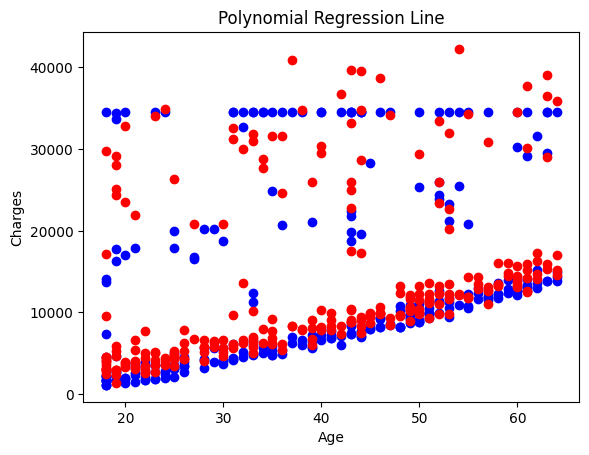

In [ ]:
#plot the polynomial regression line
plt.line(X_test['age'],y_test,color='blue')
plt.scatter(X_test['age'],y_poly_pred,color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Polynomial Regression Line')
plt.show()